In [135]:
import numpy as np
import pandas as pd 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt  

In [136]:
df_train = pd.read_csv("loanprediction_train.csv")

In [137]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [138]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [139]:
df_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [140]:
#Adding value for null value
df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace = True)
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace = True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace = True)
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace = True)
df_train['LoanAmount'].fillna(df_train['LoanAmount'].mode()[0], inplace = True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace = True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace = True)

In [142]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Number of people who take loan as group by marital status: 
Yes    398
No     213
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

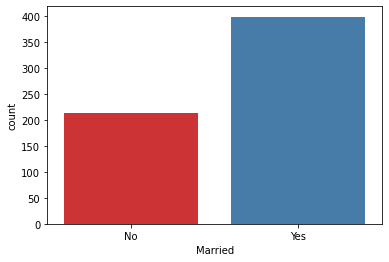

In [148]:
print ("Number of people who take loan as group by marital status: ")
print(df["Married"].value_counts())
sns.countplot(x='Married', data=df, palette = 'Set1')

Number of people who take loan as group by gender: 
Male      489
Female    112
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

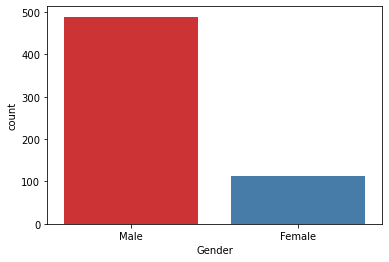

In [163]:
print ("Number of people who take loan as group by gender: ")
print(df["Gender"].value_counts())
sns.countplot(x='Gender', data=df, palette = 'Set1')

Number of people who take loan as group by education status: 
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


<AxesSubplot:xlabel='Education', ylabel='count'>

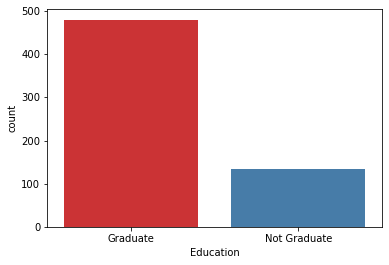

In [164]:
print ("Number of people who take loan as group by education status: ")
print(df["Education"].value_counts())
sns.countplot(x='Education', data=df, palette = 'Set1')

Number of people who take loan as group by Property_Area: 
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

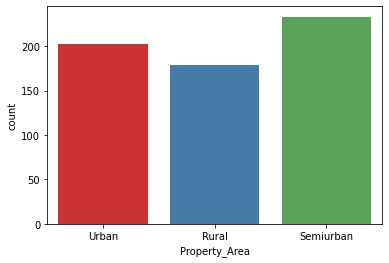

In [165]:
print ("Number of people who take loan as group by Property_Area: ")
print(df["Property_Area"].value_counts())
sns.countplot(x='Property_Area', data=df, palette = 'Set1')

Number of people who take loan as group by Loan status: 


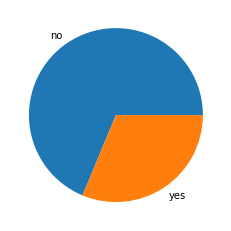

In [166]:
print ("Number of people who take loan as group by Loan status: ")
x = df['Loan_Status'].value_counts()
plt.pie(x,labels=['no','yes']);

Number of people who take loan as group by Self_Employed status: 
No     500
Yes     82
Name: Self_Employed, dtype: int64


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

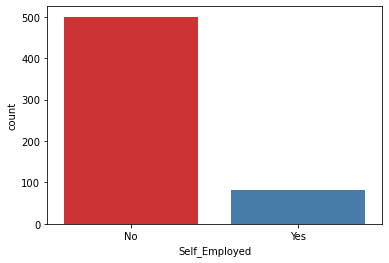

In [167]:
print ("Number of people who take loan as group by Self_Employed status: ")
print(df["Self_Employed"].value_counts())
sns.countplot(x='Self_Employed', data=df, palette = 'Set1')

In [127]:
df_train['Gender'] = df_train['Gender'].map({'Male': 1, 'Female': 0})
df_train['Married'] = df_train['Married'].map({'Yes': 1, 'No': 0})
df_train['Dependents'] = df_train['Dependents'].map({'0': 0, '1': 1 ,'2': 2 ,'3+': 3})
# Education
df_train['Education'] = df_train['Education'].map({'Graduate': 1, 'Not Graduate': 0})
# Self_Employed
df_train['Self_Employed'] = df_train['Self_Employed'].map({'Yes': 1, 'No': 0})
# 'Urban', 'Rural', 'Semiurban'
df_train['Property_Area'] = df_train['Property_Area'].map({'Urban': 0, 'Rural': 1 ,'Semiurban': 2})
# 'Y', 'N'
df_train['Loan_Status'] = df_train['Loan_Status'].map({'Y': 1, 'N': 0})

In [128]:
df_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [129]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,120.0,360.0,1.0,0,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,1,1
610,LP002979,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,1,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,0,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,0,1


In [130]:
y = df['Loan_Status']
df_train = df_train.drop('Loan_Status', axis=1)
df_train = df_train.drop('Loan_ID', axis=1)

In [131]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df_train, y , test_size = 0.25 , random_state = 42, stratify=y)

In [132]:
df_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,120.0,360.0,1.0,0
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,1
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,0
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,0


In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [134]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_scaled,y_train)
y_pred = knn.predict(x_test_scaled)
print('evaluation on training', knn.score(x_train_scaled,y_train))
print('evaluation on testing', knn.score(x_test_scaled,y_test))

evaluation on training 0.8152173913043478
evaluation on testing 0.8051948051948052


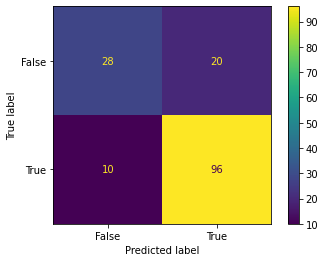

In [175]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test,y_pred1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()